In [1]:
from typing import List, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_run_data(
    loc: str, agent: str
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    rewards_L = [
        pd.read_csv(
            "../logs/{}/{}-{}-L-rewards.csv".format(loc, agent, i), usecols=[1]
        )
        for i in range(10)
    ]
    episodes_L = [
        pd.read_csv(
            "../logs/{}/{}-{}-L-episodes.csv".format(loc, agent, i), usecols=[1]
        )
        for i in range(10)
    ]
    rewards_T = [
        pd.read_csv(
            "../logs/{}/{}-{}-T-rewards.csv".format(loc, agent, i), usecols=[1]
        )
        for i in range(10)
    ]
    episodes_T = [
        pd.read_csv(
            "../logs/{}/{}-{}-T-episodes.csv".format(loc, agent, i), usecols=[1]
        )
        for i in range(10)
    ]

    return rewards_L, episodes_L, rewards_T, episodes_T


In [3]:
from ..agent import Percept


def parse_percept(q: str) -> Percept:
    s, a, s_, r, t = q[1:-1].split(", ")

    s = np.fromstring(s[1:-1], dtype=float, sep=" ")
    a = int(a)
    s_ = np.fromstring(s_[1:-1], dtype=float, sep=" ")
    r = float(r)
    t = bool(t)

    return Percept(s, s_, a, r, t, None)


In [4]:
def parse_agent_data(loc: str, agent: str):
    rewards_L, episodes_L, rewards_T, episodes_T = read_run_data(
        loc, agent
    )

    for i in range(len(episodes_L)):
        episodes_L[i]["0"] = episodes_L[i]["0"].map(parse_percept)
        episodes_T[i]["0"] = episodes_T[i]["0"].map(parse_percept)

    return rewards_L, episodes_L, rewards_T, episodes_T

In [5]:
def plot_rewards(reward_history: List[float], loc: str, label: str):
    plt.figure()
    p = sns.lineplot(
        x=[x for x in range(0, len(reward_history))], y=reward_history
    )
    p.set(xlabel="Episode", ylabel="Reward")
    p.set_ylim(ymin=0, ymax=2000)

    plt.savefig(
        "{}/{}-reward.png".format(loc, label),
        format="png",
    )

In [6]:
rnd_rewards_L, rnd_episodes_L, rnd_rewards_T, rnd_episodes_T = parse_agent_data("0-RANDOM", "RANDOM")
neat_rewards_L, neat_episodes_L, neat_rewards_T, neat_episodes_T = parse_agent_data("1-NEAT", "NEAT")
dql_rewards_L, dql_episodes_L, dql_rewards_T, dql_episodes_T = parse_agent_data("2-DQL", "DQL")
dql_per_rewards_L, dql_per_episodes_L, dql_per_rewards_T, dql_per_episodes_T = parse_agent_data("3-DQL-PER", "DQL")
nedrl_rewards_L, nedrl_episodes_L, nedrl_rewards_T, nedrl_episodes_T = parse_agent_data("4-NEDRL", "NEAT-DRL")
nedrl_per_rewards_L, nedrl_per_episodes_L, nedrl_per_rewards_T, nedrl_per_episodes_T = parse_agent_data("5-NEDRL-PER", "NEAT-DRL")
nedrl_da_rewards_L, nedrl_da_episodes_L, nedrl_da_rewards_T, nedrl_da_episodes_T = parse_agent_data("6-NEDRL-DA", "NEAT-DRL")
nedrl_per_da_rewards_L, nedrl_per_da_episodes_L, nedrl_per_da_rewards_T, nedrl_per_da_episodes_T = parse_agent_data("7-NEDRL-PER-DA", "NEAT-DRL")

## Random Agent

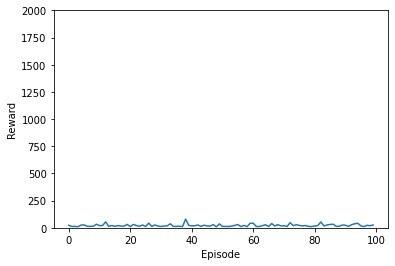

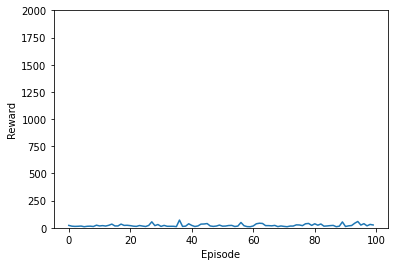

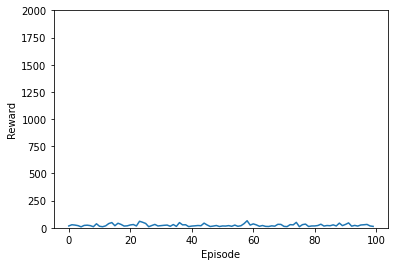

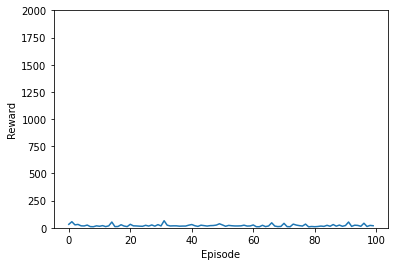

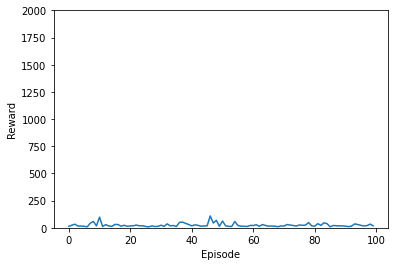

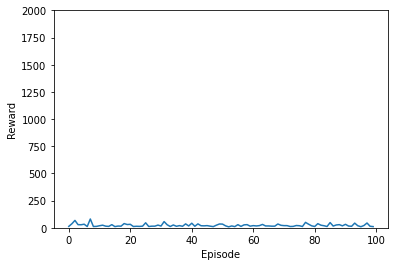

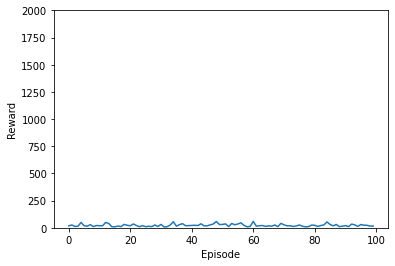

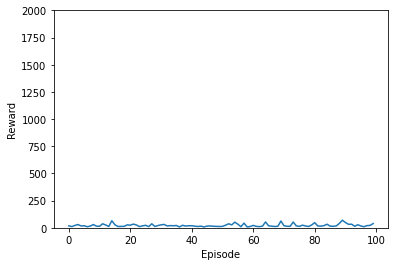

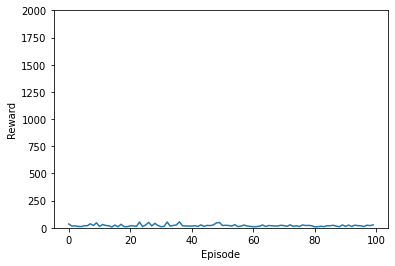

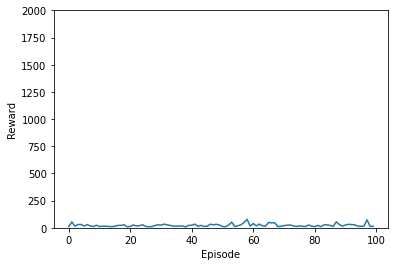

In [7]:
for i in range(len(rnd_rewards_L)):
    plot_rewards(rnd_rewards_L[i]["0"], "../logs/0-RANDOM", "RANDOM-{}-L".format(i))

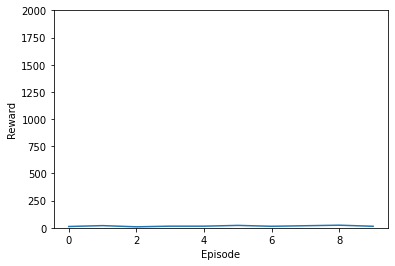

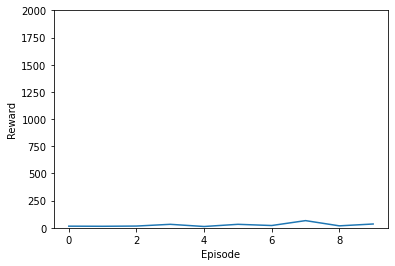

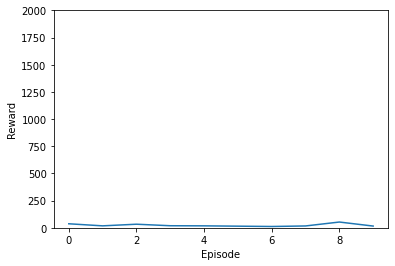

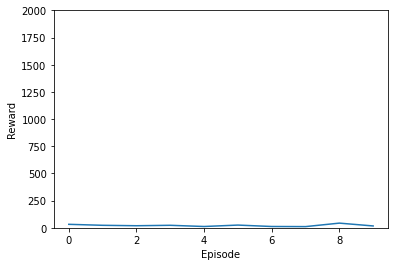

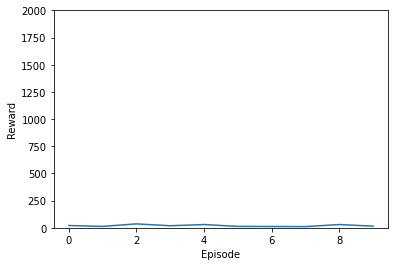

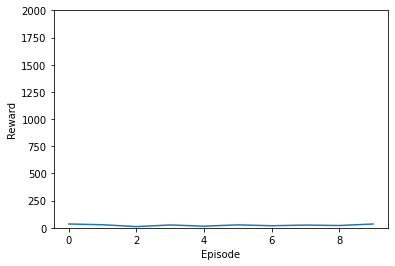

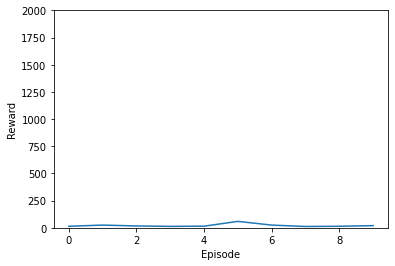

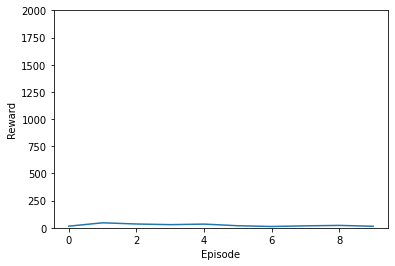

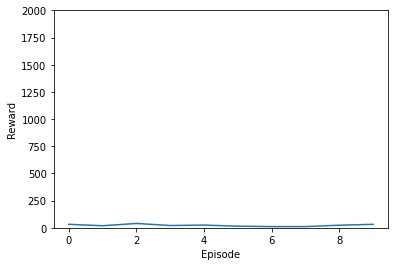

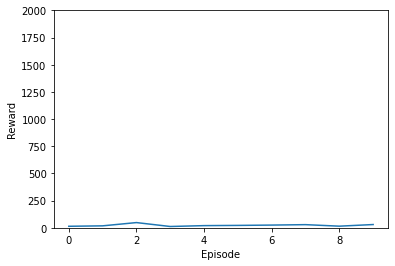

In [8]:
for i in range(len(rnd_rewards_T)):
    plot_rewards(rnd_rewards_T[i]["0"], "../logs/0-RANDOM", "RANDOM-{}-T".format(i))

## NEAT Agent

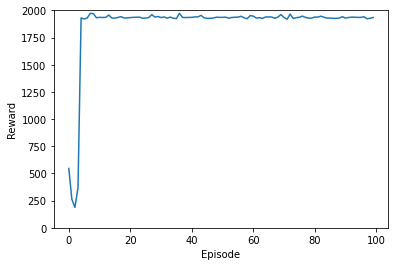

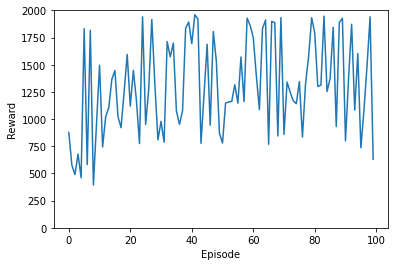

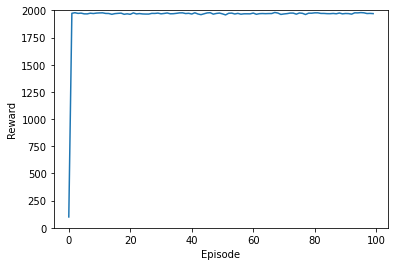

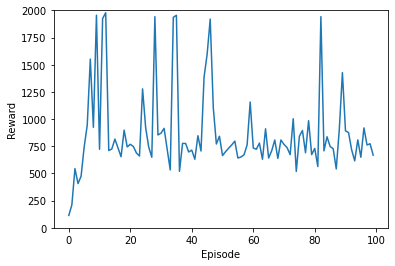

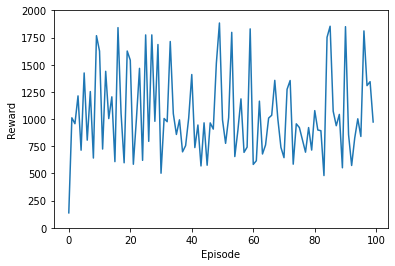

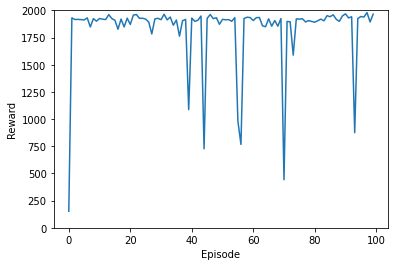

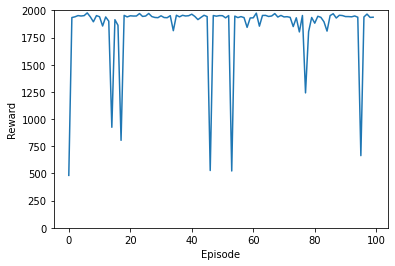

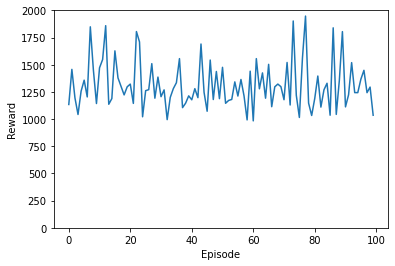

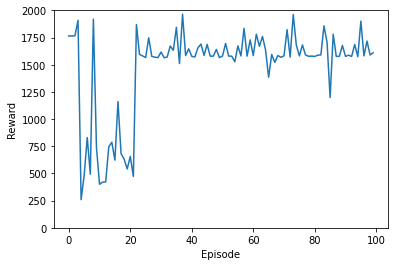

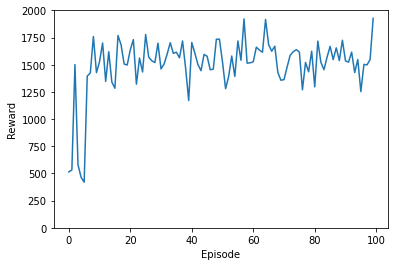

In [9]:
for i in range(len(neat_rewards_L)):
    plot_rewards(neat_rewards_L[i]["0"], "../logs/1-NEAT", "NEAT-{}-L".format(i))

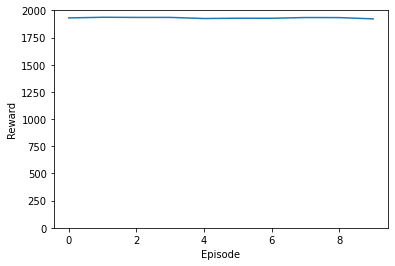

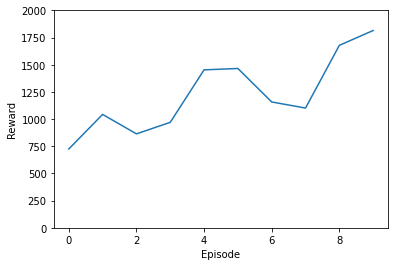

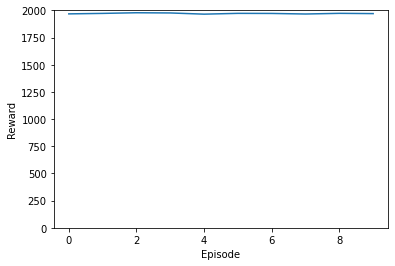

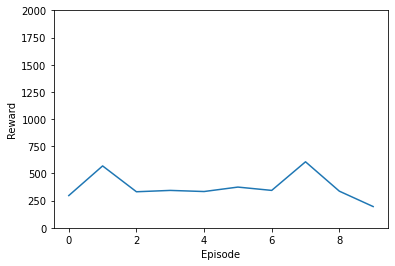

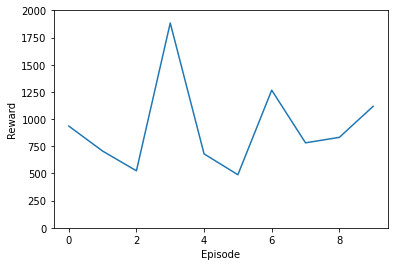

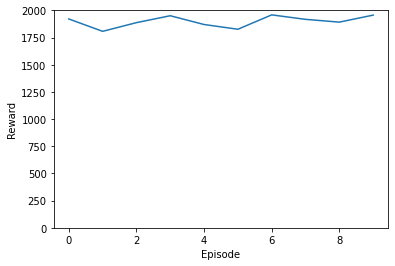

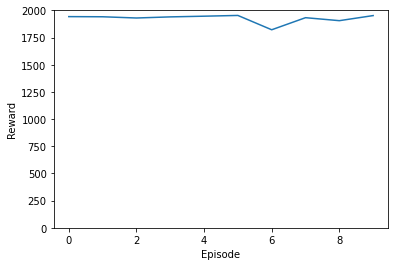

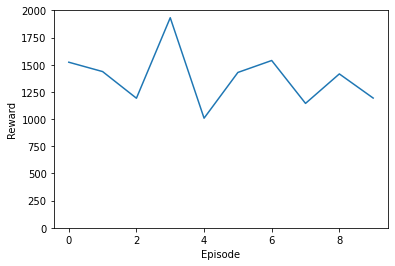

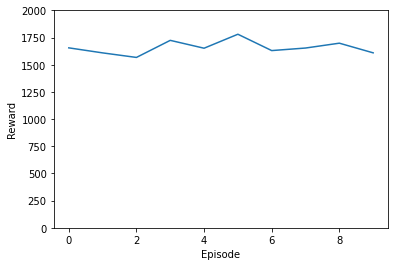

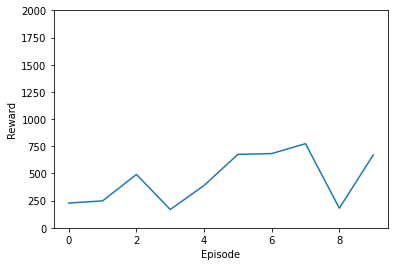

In [10]:
for i in range(len(neat_rewards_T)):
    plot_rewards(neat_rewards_T[i]["0"], "../logs/1-NEAT", "NEAT-{}-T".format(i))

## DQL Agent

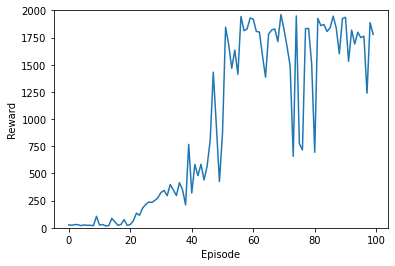

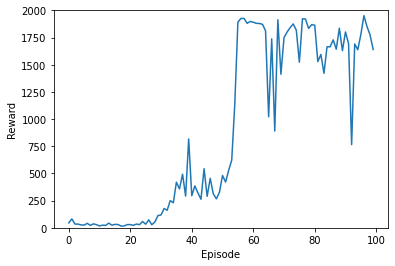

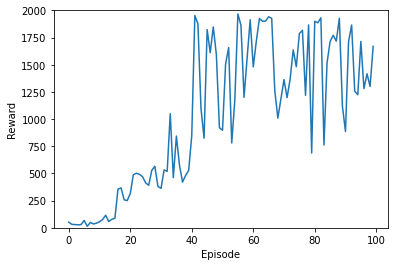

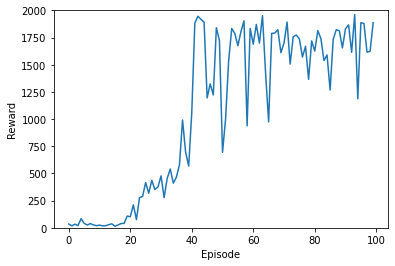

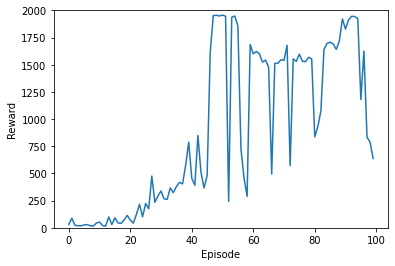

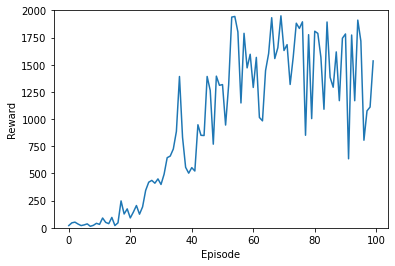

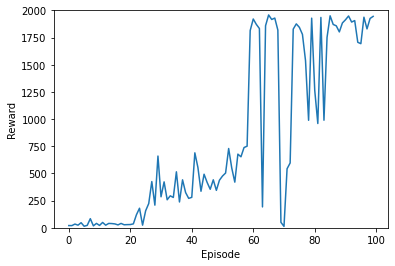

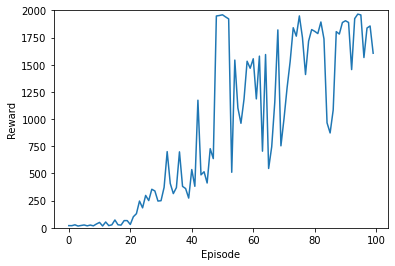

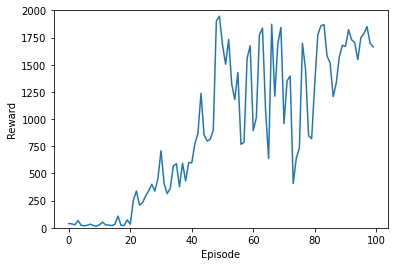

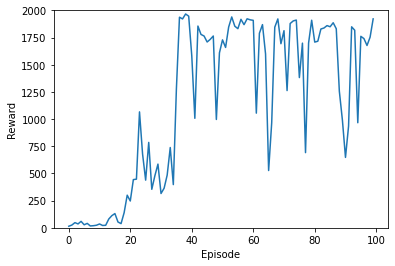

In [11]:
for i in range(len(dql_rewards_L)):
    plot_rewards(dql_rewards_L[i]["0"], "../logs/2-DQL", "DQL-{}-L".format(i))

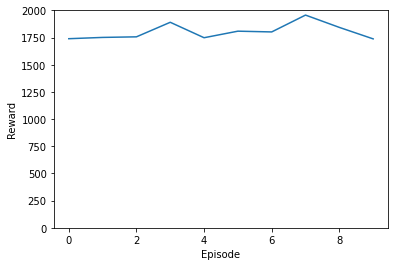

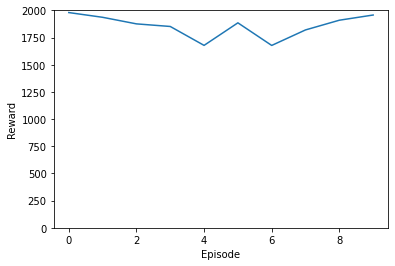

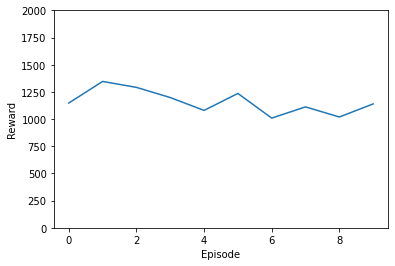

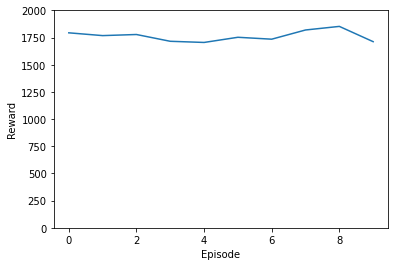

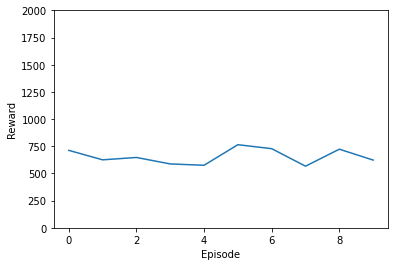

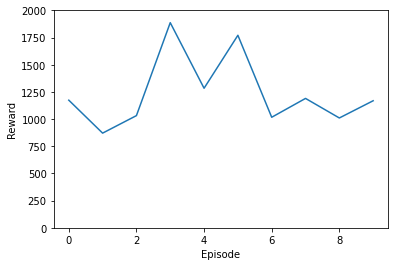

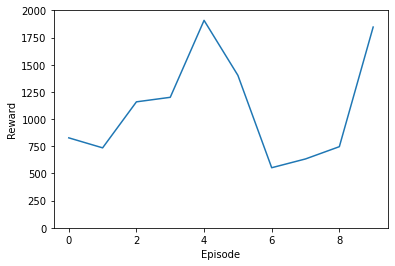

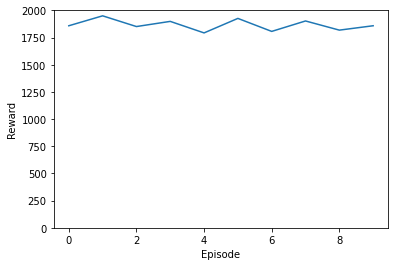

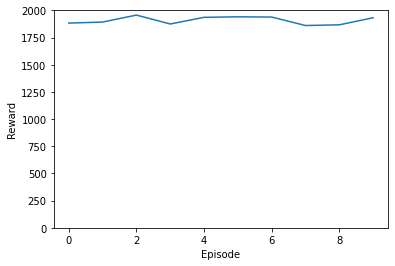

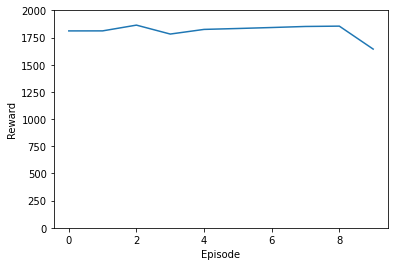

In [12]:
for i in range(len(dql_rewards_T)):
    plot_rewards(dql_rewards_T[i]["0"], "../logs/2-DQL", "DQL-{}-T".format(i))

## DQL Agent - PER

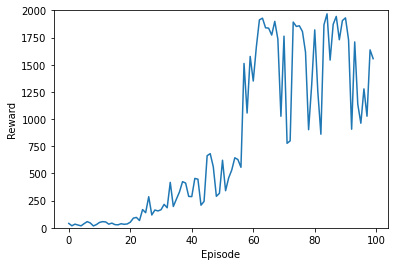

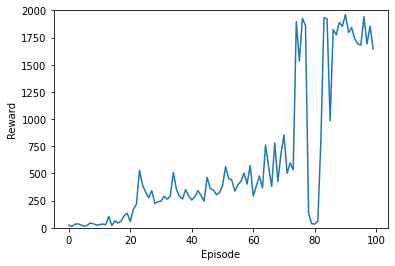

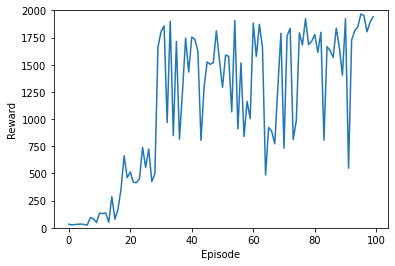

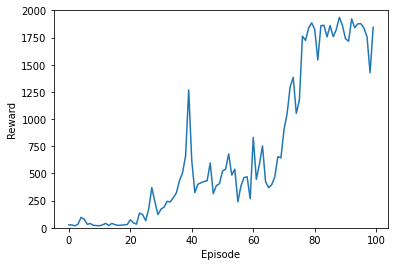

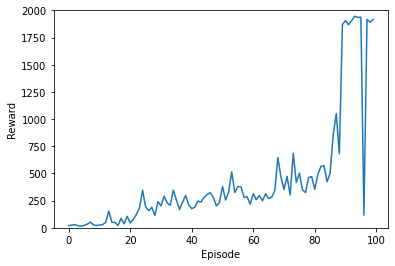

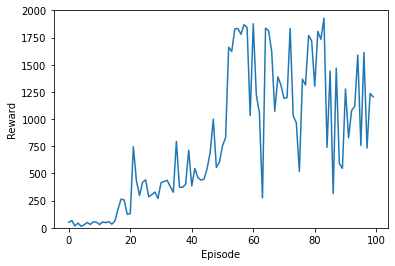

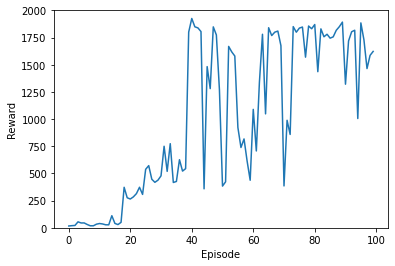

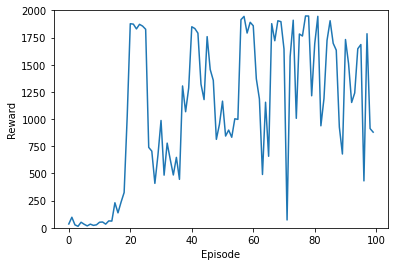

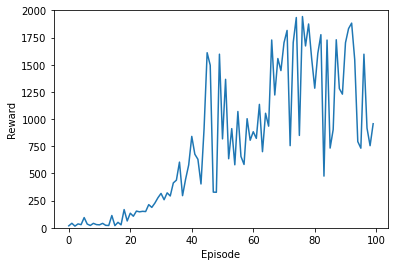

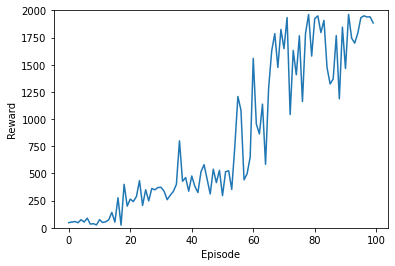

In [13]:
for i in range(len(dql_per_rewards_L)):
    plot_rewards(dql_per_rewards_L[i]["0"], "../logs/3-DQL-PER", "DQL-{}-L".format(i))

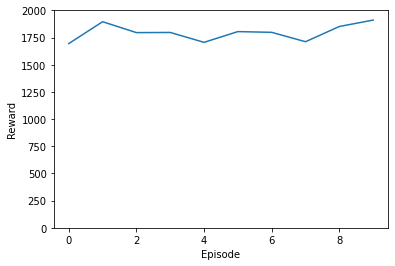

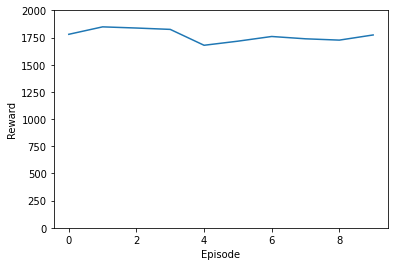

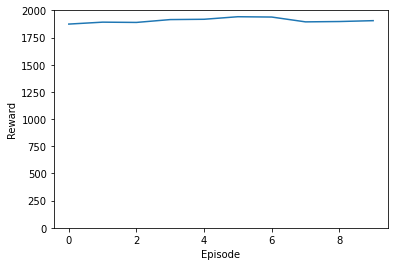

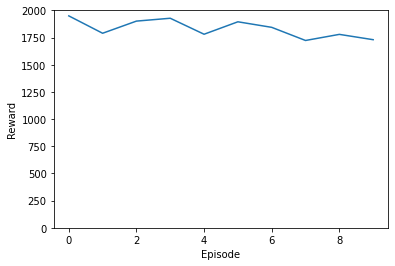

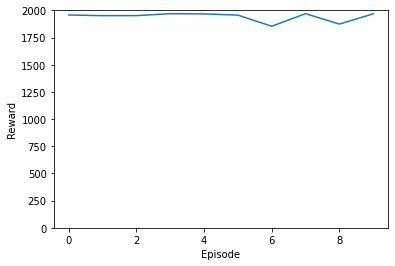

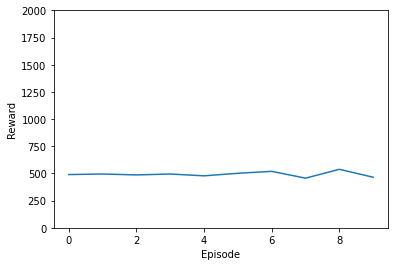

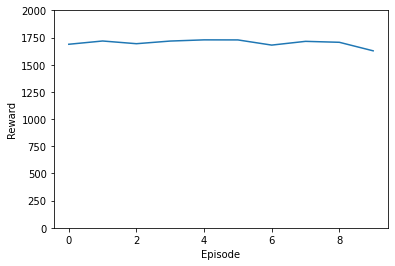

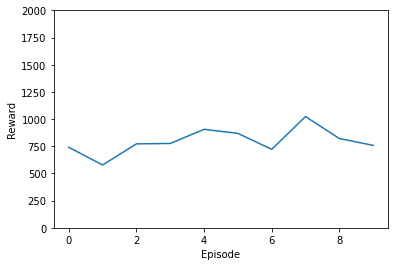

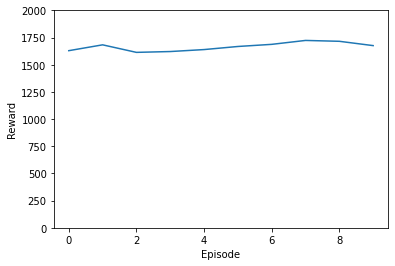

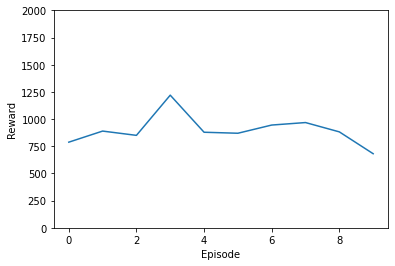

In [14]:
for i in range(len(dql_per_rewards_T)):
    plot_rewards(dql_per_rewards_T[i]["0"], "../logs/3-DQL-PER", "DQL-{}-T".format(i))

## NEDRL Agent

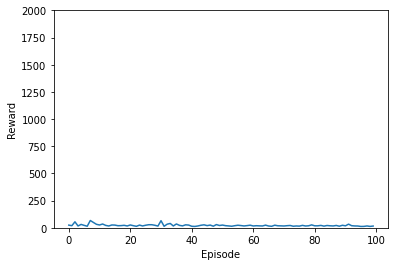

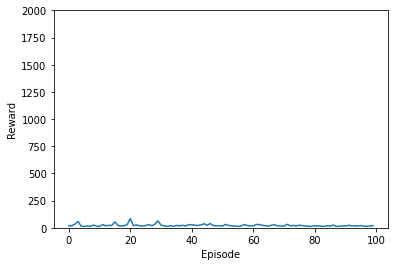

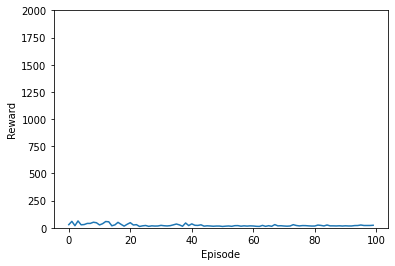

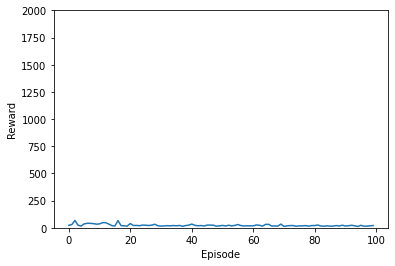

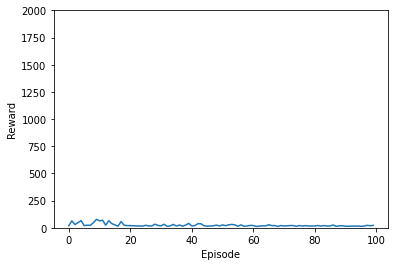

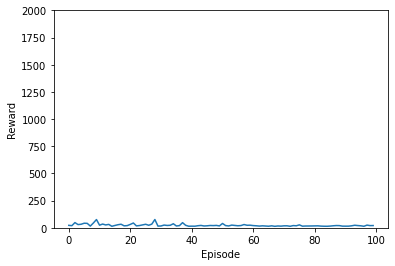

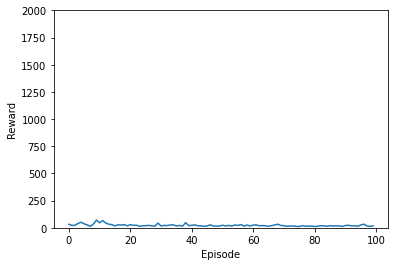

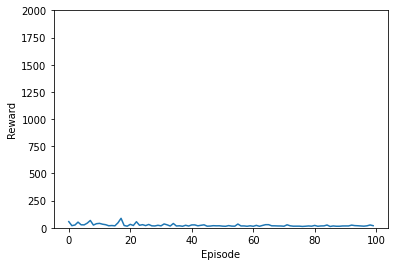

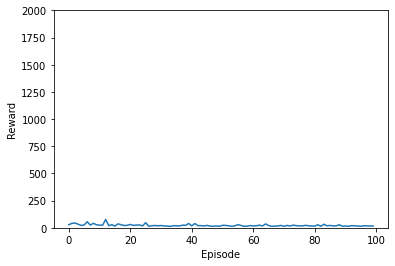

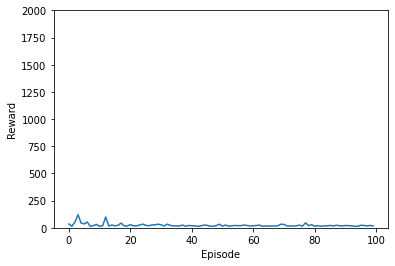

In [23]:
for i in range(len(nedrl_rewards_L)):
    plot_rewards(nedrl_rewards_L[i]["0"], "../logs/4-NEDRL", "NEAT-DRL-{}-L".format(i))

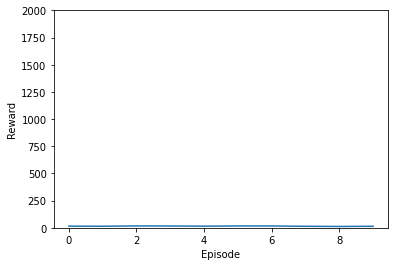

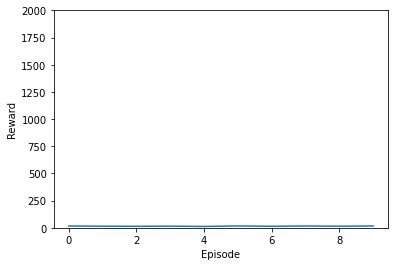

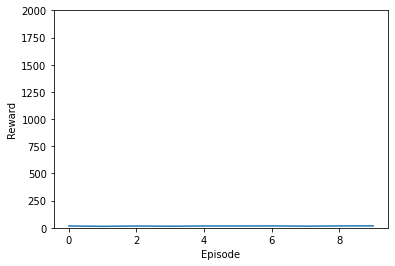

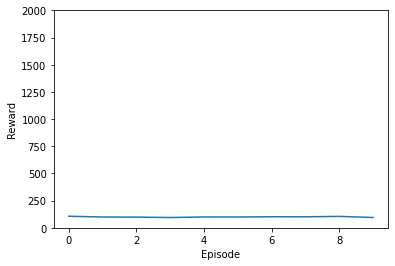

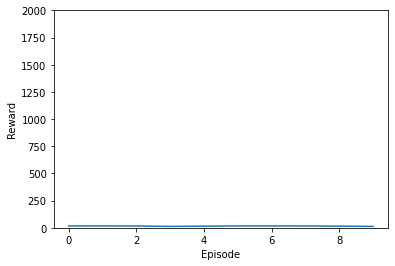

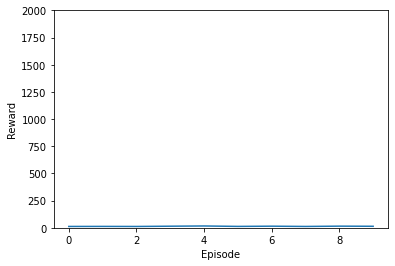

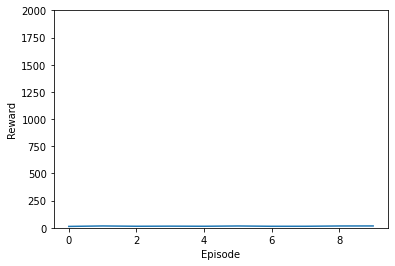

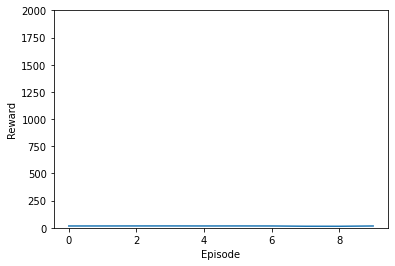

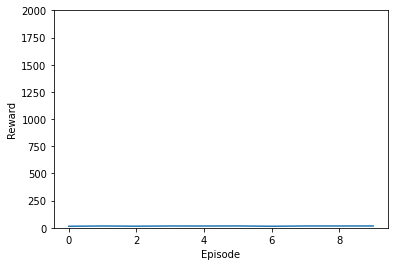

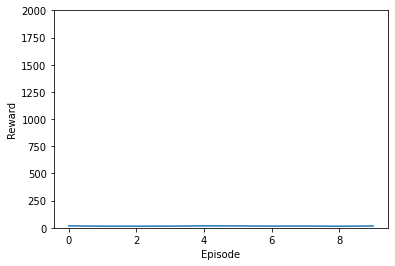

In [24]:
for i in range(len(nedrl_rewards_T)):
    plot_rewards(nedrl_rewards_T[i]["0"], "../logs/4-NEDRL", "NEAT-DRL-{}-T".format(i))

## NEDRL Agent - PER

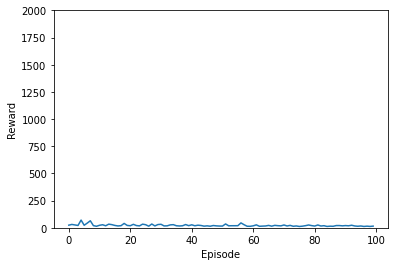

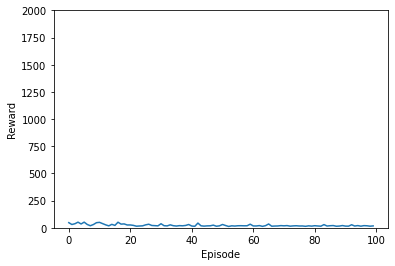

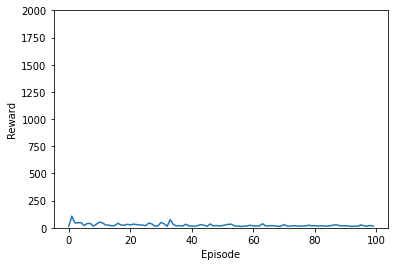

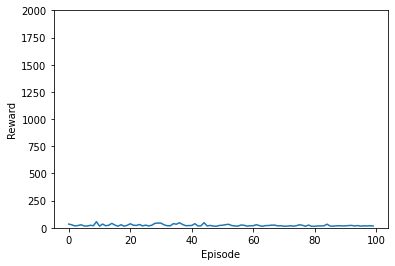

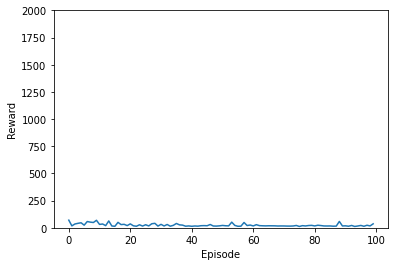

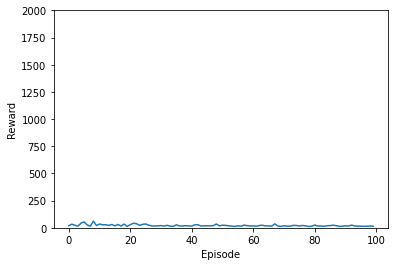

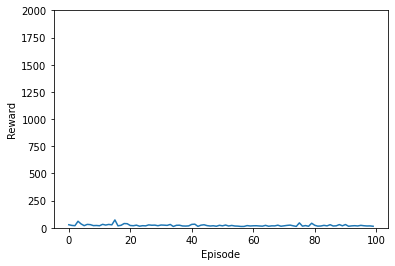

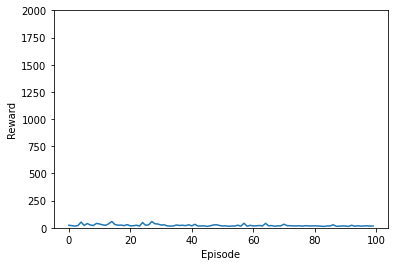

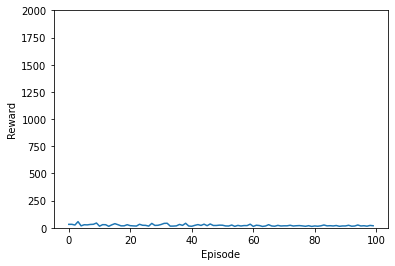

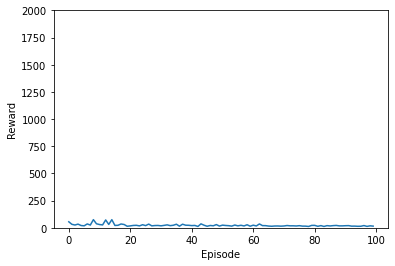

In [25]:
for i in range(len(nedrl_per_rewards_L)):
    plot_rewards(nedrl_per_rewards_L[i]["0"], "../logs/5-NEDRL-PER", "NEAT-DRL-{}-L".format(i))

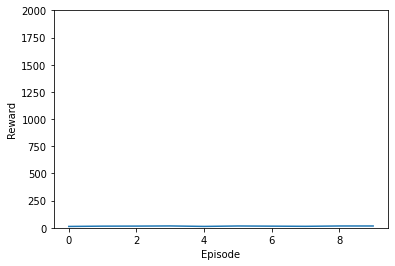

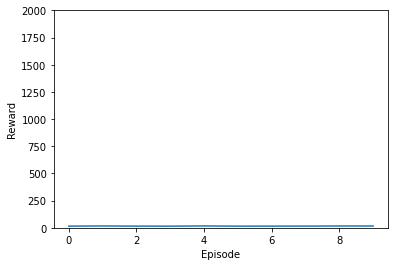

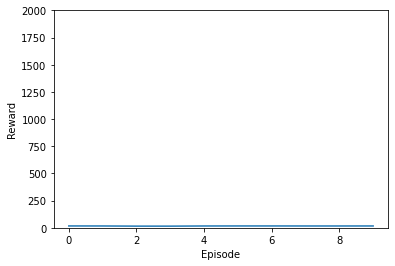

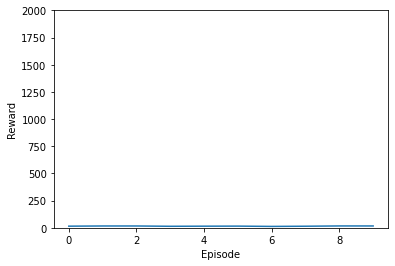

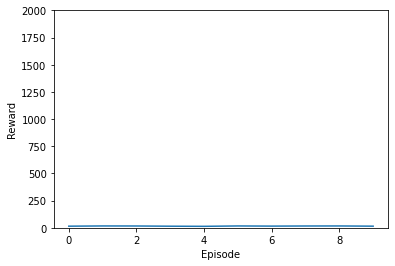

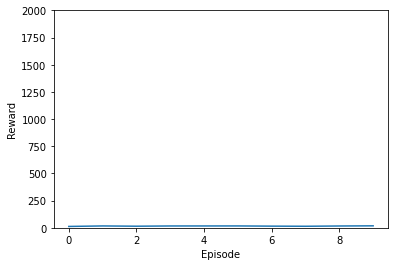

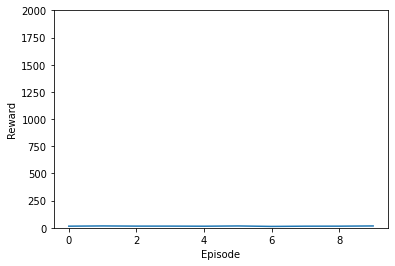

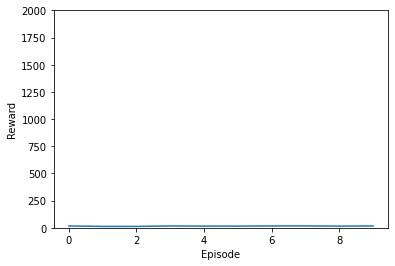

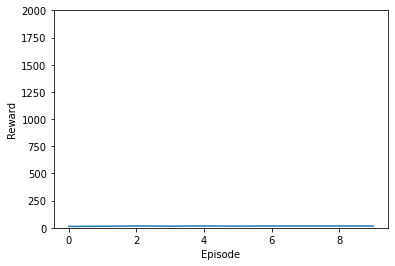

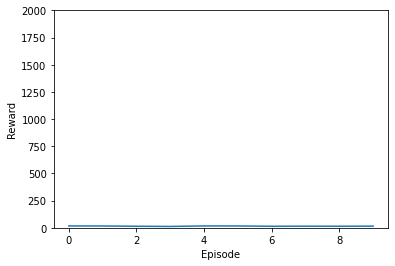

In [26]:
for i in range(len(nedrl_per_rewards_T)):
    plot_rewards(nedrl_per_rewards_T[i]["0"], "../logs/5-NEDRL-PER", "NEAT-DRL-{}-T".format(i))

## NEDRL Agent - Duelling Architecture

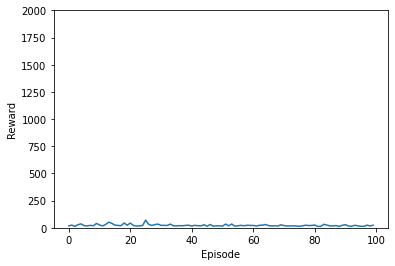

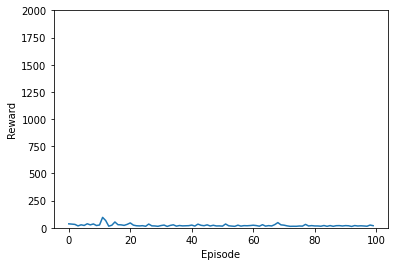

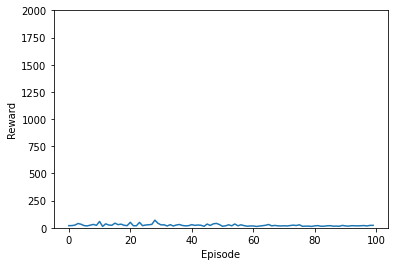

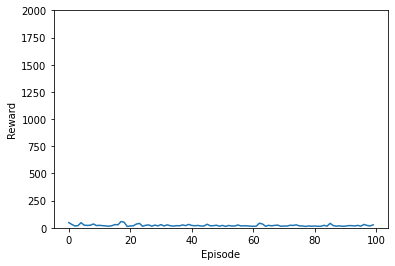

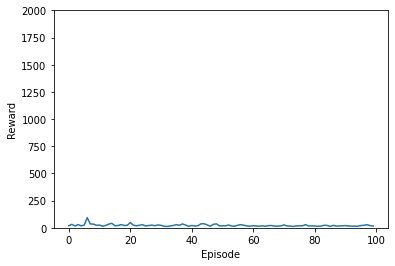

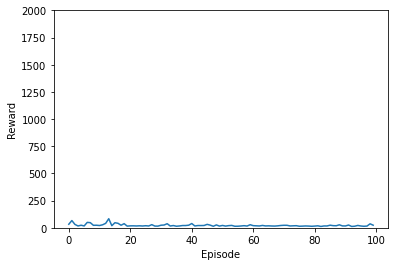

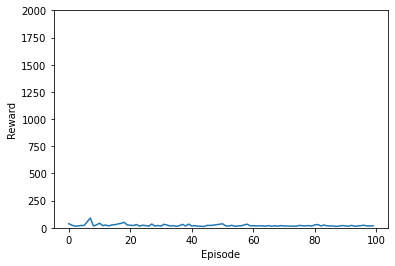

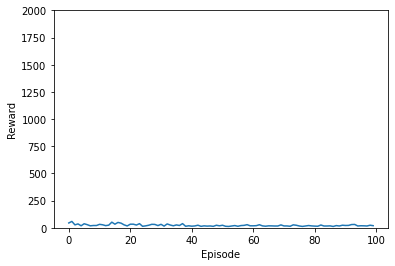

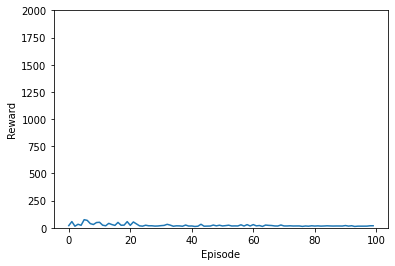

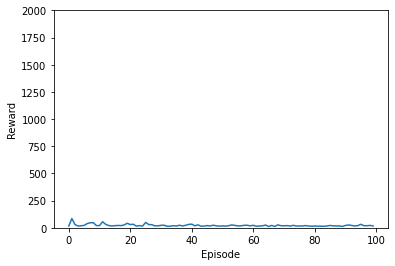

In [27]:
for i in range(len(nedrl_da_rewards_L)):
    plot_rewards(nedrl_da_rewards_L[i]["0"], "../logs/6-NEDRL-DA", "NEAT-DRL-{}-L".format(i))

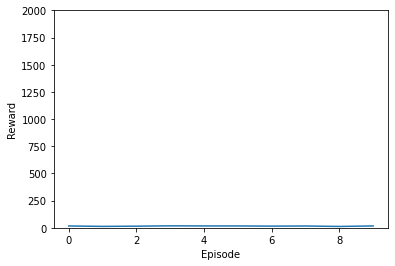

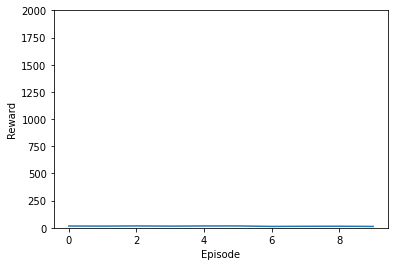

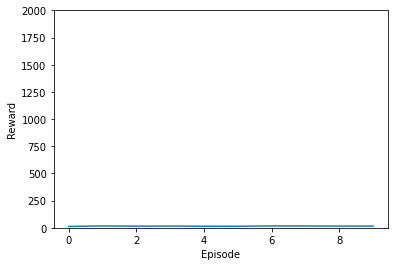

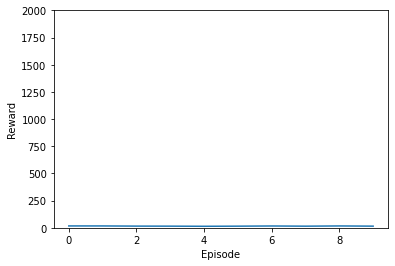

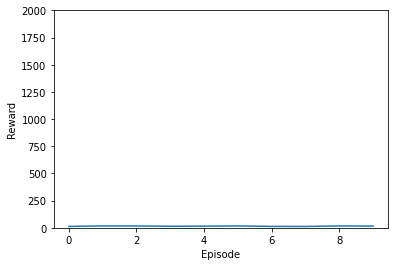

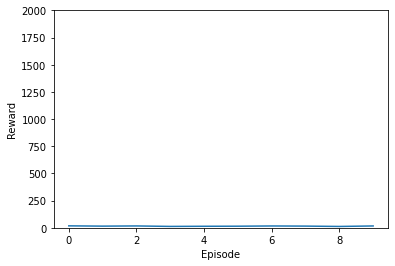

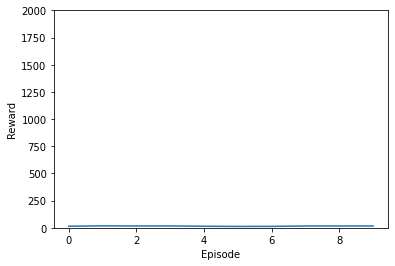

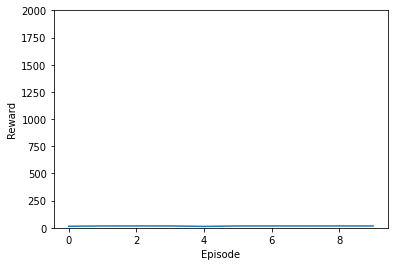

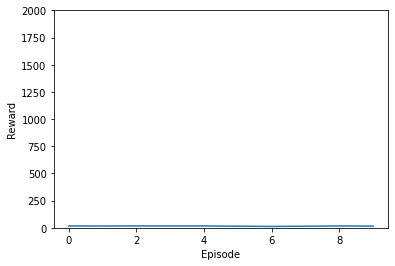

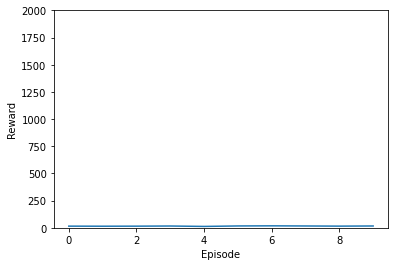

In [28]:
for i in range(len(nedrl_da_rewards_T)):
    plot_rewards(nedrl_da_rewards_T[i]["0"], "../logs/6-NEDRL-DA", "NEAT-DRL-{}-T".format(i))

## NEDRL Agent - PER & Duelling Architecture

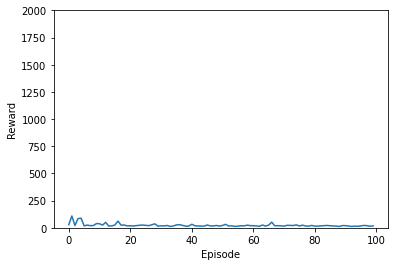

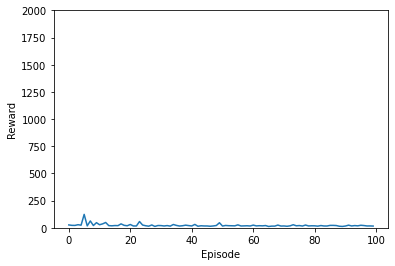

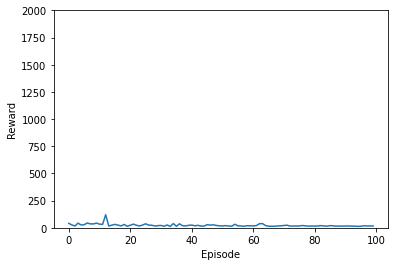

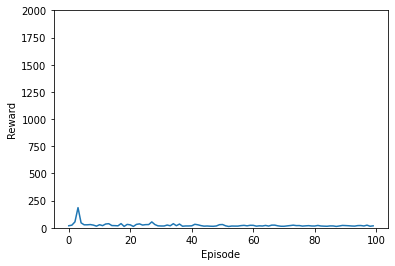

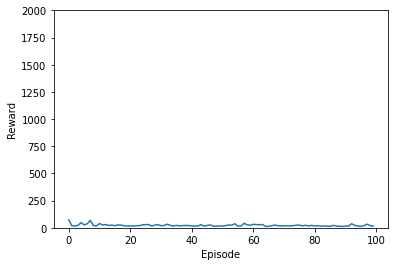

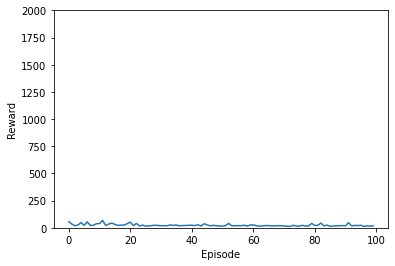

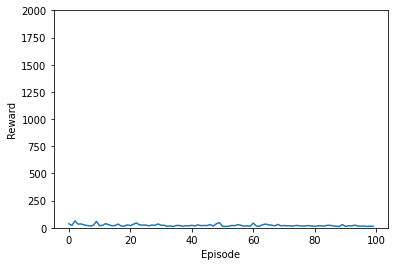

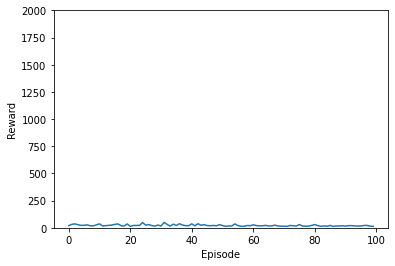

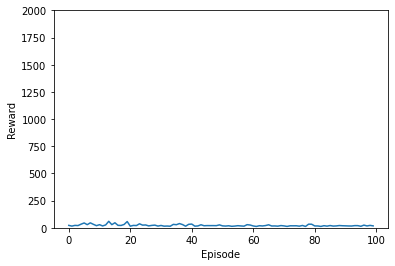

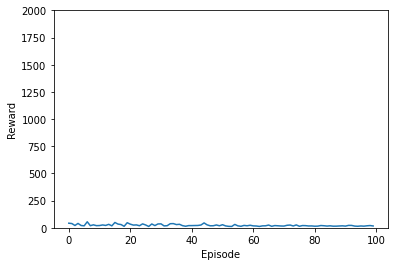

In [29]:
for i in range(len(nedrl_per_da_rewards_L)):
    plot_rewards(nedrl_per_da_rewards_L[i]["0"], "../logs/7-NEDRL-PER-DA", "NEAT-DRL-{}-L".format(i))

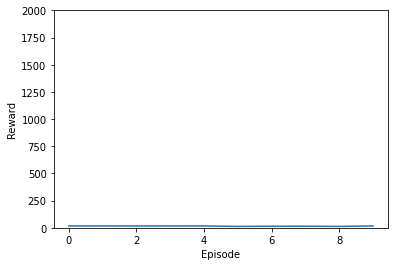

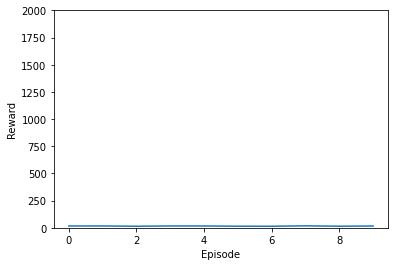

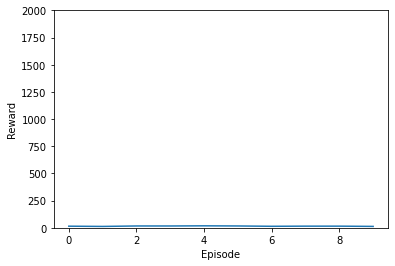

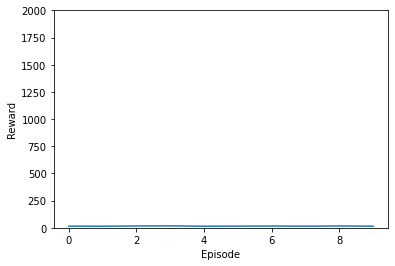

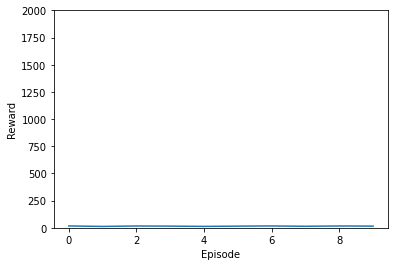

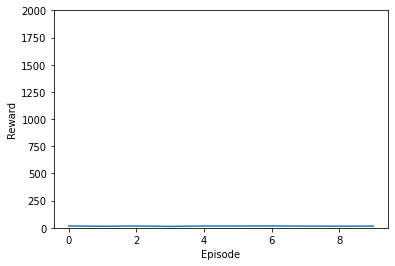

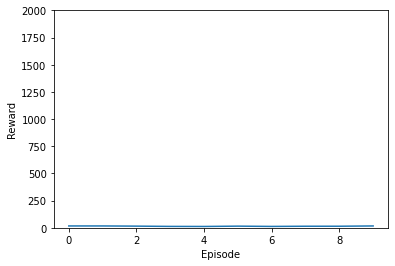

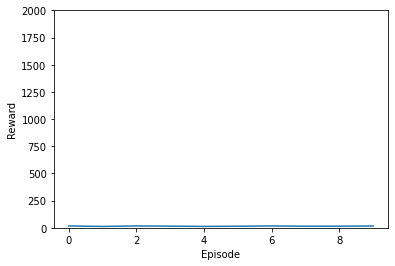

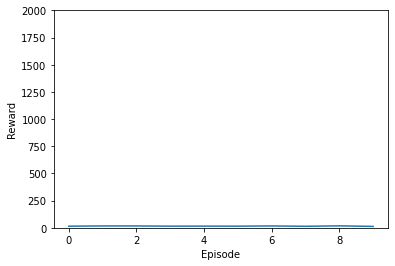

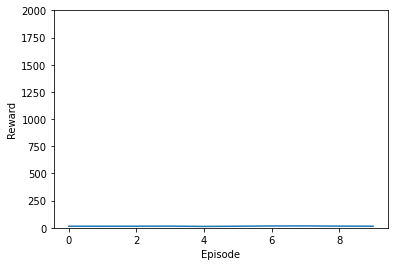

In [30]:
for i in range(len(nedrl_per_da_rewards_T)):
    plot_rewards(nedrl_per_da_rewards_T[i]["0"], "../logs/7-NEDRL-PER-DA", "NEAT-DRL-{}-T".format(i))

# Average Rewards

In [74]:
rewards = neat_rewards_T

s = 0
N = 0
for i in range(10):
    tot = rewards[i]["0"].sum()
    n = len(rewards[i]["0"])
    s += tot
    N += n

    print(tot / n)

print()
print(s / N)

1930.632391494347
1227.1860373378918
1971.253679573366
373.2582211800698
921.402967285723
1898.554410731686
1926.4104068573863
1381.3139908513635
1657.820621927486
450.49610906422424

1373.8328836303542
